In [193]:
# imports

import csv
import matplotlib.pyplot as plt
import surprise
import pandas as pd
import numpy as np
import math
import collections
from collections import Counter
from math import sqrt
from sklearn.metrics import mean_squared_error
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Trainset
from collections import defaultdict


In [88]:
# load data

df = pd.read_csv('ratings.csv',delimiter=',', names = ['user_id', 'item_id', 'rating', 'timestamp'], header=0)
print(df)
print(df.shape)

user_list = list(df.user_id)
movie_list = list(df.item_id)
rating_list=list(df.rating)

# Creating R matrix where rows: users, columns: movies , R(i,j) rating of jth movie by ith user 
R = df.pivot_table(index=['user_id'],columns=['item_id'],values='rating',fill_value=0).values
print(R)
print(R.shape)

        user_id  item_id  rating   timestamp
0             1       31     2.5  1260759144
1             1     1029     3.0  1260759179
2             1     1061     3.0  1260759182
3             1     1129     2.0  1260759185
4             1     1172     4.0  1260759205
5             1     1263     2.0  1260759151
6             1     1287     2.0  1260759187
7             1     1293     2.0  1260759148
8             1     1339     3.5  1260759125
9             1     1343     2.0  1260759131
10            1     1371     2.5  1260759135
11            1     1405     1.0  1260759203
12            1     1953     4.0  1260759191
13            1     2105     4.0  1260759139
14            1     2150     3.0  1260759194
15            1     2193     2.0  1260759198
16            1     2294     2.0  1260759108
17            1     2455     2.5  1260759113
18            1     2968     1.0  1260759200
19            1     3671     3.0  1260759117
20            2       10     4.0   835355493
21        

In [91]:
rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

movie_counts = Counter(movie_list)
user_rating_counts = Counter(user_list)

In [92]:
# Question 1: Compute sparsity of movie rating dataset

def q1():
    total_possible_ratings = 671*9125     #total number of users * total number of movies    #R.shape[0] * R.shape[1]
    available_ratings = 100004     # total number of ratings available    #df.shape[0]
    sparsity = float(available_ratings) / float(total_possible_ratings)
    print('Sparsity of the dataset: ', sparsity)

q1()

Sparsity of the dataset:  0.01633285017250883


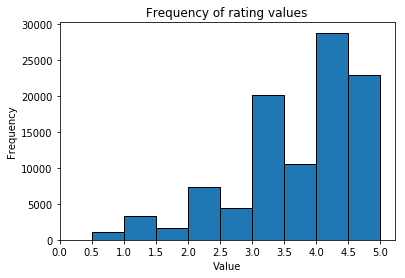

In [125]:
# Question 2:  Histogram of rating counts

def q2():
    ratings = df.iloc[0:df.shape[0], 2] 
    plt.hist(ratings, ec='black', bins=9)#, bins=10)#, bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
    plt.title("Frequency of rating values")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(0, 5.5, 0.5))
    plt.show()

q2()

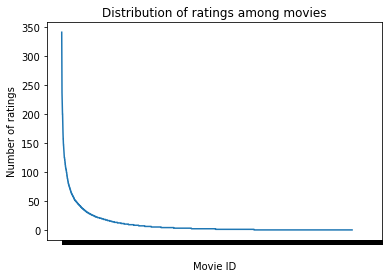

X labels (Movie_ids ordered by decreasing frequency):  [356, 296, 318, 593, 260, 480, 2571, 1, 527, 589, 1196, 110, 1270, 608, 2858, 1198, 780, 1210, 588, 457, 590, 2959, 47, 50, 150, 364, 858, 4993, 380, 592, 32, 2762, 2028, 1580, 5952, 377, 595, 7153, 344, 4306, 648, 1265, 1721, 1197, 3578, 1097, 1240, 231, 367, 1704, 500, 1036, 736, 34, 1073, 2716, 1291, 597, 541, 1136, 316, 1193, 165, 6539, 2628, 1682, 1221, 733, 5349, 2918, 1089, 293, 4226, 1213, 4963, 4886, 153, 586, 1214, 3793, 587, 2997, 8961, 253, 539, 1200, 3114, 1617, 4973, 778, 1923, 924, 10, 357, 6377, 58559, 1206, 2396, 39, 1732, 1961, 111, 1527, 919, 1968, 912, 349, 5445, 329, 4995, 3996, 208, 1917, 1208, 1259, 2683, 2706, 6874, 79132, 292, 454, 223, 1387, 2987, 2797, 2329, 2, 288, 1517, 7361, 434, 2791, 1393, 2502, 2355, 4896, 33794, 750, 1222, 2174, 2916, 36, 6, 3147, 7438, 185, 339, 1258, 25, 1225, 5418, 1784, 3897, 3751, 2324, 5989, 2011, 2115, 1610, 4022, 4027, 442, 21, 4011, 1246, 1220, 104, 2012, 141, 4878, 95, 15

In [127]:
# Question 3: 

def q3():
#     movie_counts = [0]*R.shape[1]
#     for i in range(R.shape[1]):
#         X = np.array(R[:,i])
#         movie_counts[i] = np.count_nonzero(X)
#     #plt.bar(range(R.shape[1]),movie_counts)
#     movie_counts.sort(reverse=True)
        
    movie_ids = list()
    no_of_ratings = list()
    for i in sorted(movie_counts, key=movie_counts.get, reverse=True):
        movie_ids.append(i)
        no_of_ratings.append(movie_counts[i])
        
    plt.plot(no_of_ratings)
    plt.title("Distribution of ratings among movies")
    plt.xlabel("Movie ID")
    plt.ylabel("Number of ratings")
    plt.xticks(range(10000), " ")
    plt.show()
    print('X labels (Movie_ids ordered by decreasing frequency): ', movie_ids)
q3()

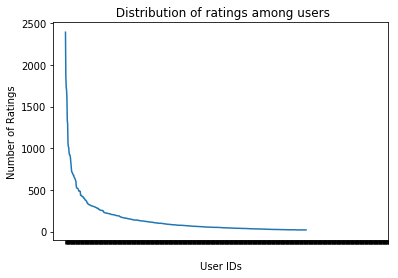

X labels (User IDs ordered by decreasing frequency):  [547, 564, 624, 15, 73, 452, 468, 380, 311, 30, 294, 509, 580, 213, 212, 472, 388, 23, 457, 518, 461, 232, 102, 262, 475, 306, 119, 654, 358, 529, 575, 105, 56, 353, 664, 48, 587, 165, 596, 195, 384, 463, 605, 481, 665, 607, 19, 199, 285, 150, 405, 268, 242, 505, 615, 480, 514, 130, 299, 17, 423, 574, 111, 346, 157, 187, 128, 407, 402, 77, 382, 598, 134, 355, 243, 537, 430, 534, 313, 585, 95, 561, 608, 427, 239, 220, 247, 312, 460, 387, 577, 292, 431, 544, 652, 78, 439, 176, 648, 88, 287, 426, 200, 562, 522, 500, 295, 149, 240, 270, 442, 177, 236, 303, 408, 22, 373, 412, 152, 367, 466, 471, 558, 214, 345, 125, 57, 205, 253, 394, 4, 185, 501, 275, 597, 363, 553, 41, 433, 94, 627, 584, 434, 599, 72, 86, 118, 283, 99, 34, 342, 265, 133, 344, 189, 26, 620, 328, 646, 350, 418, 61, 428, 533, 595, 21, 83, 371, 510, 81, 519, 93, 563, 235, 250, 520, 390, 487, 324, 91, 626, 647, 516, 159, 378, 75, 255, 659, 254, 396, 316, 609, 641, 417, 33, 1

In [128]:
# Question 4: Plot of user rating counts

def q4():
    #users = df.iloc[0:df.shape[0], 0] 
    #plt.hist(users,bins=range(R.shape[0]))
#     rating_counts = [0]*R.shape[0]
#     for i in range(R.shape[0]):
#         X = np.array(R[i,:])
#         rating_counts[i] = np.count_nonzero(X)
#     rating_counts.sort(reverse=True)

    user_ids = list()
    no_of_ratings = list()
    for i in sorted(user_rating_counts, key=user_rating_counts.get, reverse=True):
        user_ids.append(i)
        no_of_ratings.append(user_rating_counts[i])
    
    plt.plot(no_of_ratings)
    plt.title(" Distribution of ratings among users")
    plt.xlabel("User IDs")
    plt.ylabel("Number of Ratings")
    plt.xticks(range(900), " ")
    plt.show()
    print('X labels (User IDs ordered by decreasing frequency): ', user_ids)
    
q4()

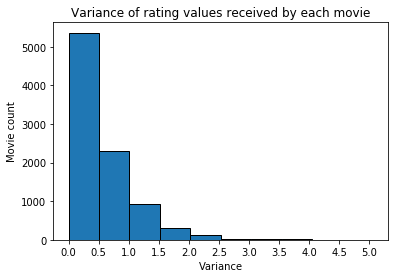

In [117]:
# Question 6 : Histogram of variance

def q6():
#     variances = [0]*R.shape[1]
#     for i in range(R.shape[1]): 
#         X = np.trim_zeros(R[:,i]) 
#         variances[i] = np.var(X)

    data=zip(movie_list,rating_list)
    d = collections.defaultdict(list)
    for movie,rating in data:
        d[movie].append(rating)
    
    movie = []
    variance = []
    for i in d.keys():
        movie.append(i)
        variance.append(np.var(d[i]))
    
    plt.hist(variance, bins=10, ec='black')
    plt.title("Variance of rating values received by each movie")
    plt.xlabel("Variance")
    plt.ylabel("Movie count")
    plt.xticks(np.arange(0, 5.5, 0.5))
    plt.show()


q6()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100


K values:  range(2, 102, 2)


Average RMSE Values:  [1.0530770120109612, 0.97861907193292175, 0.95116566966823668, 0.94029377666341707, 0.93374035326850358, 0.92920770678165066, 0.92590920935945031, 0.92285258060461572, 0.92356453671226935, 0.92191555180623919, 0.92109466017762431, 0.91992721854600923, 0.91984219933921896, 0.91845495682390044, 0.91885798905382676, 0.91844261091811785, 0.92006341061791497, 0.92050894778698744, 0.91864512289221367, 0.91861406160103498, 0.91815591342786307, 0.91927134762689078, 0.91738780325978908, 0.91844033677450532, 0.91867050535211292, 0.91859785405691363, 0.91963852300871385, 0.9180632996769319, 0.91898702989298564, 0.91906132858964984, 0.91855707652998364, 0.91885325358473735, 0.91920139868158091, 0.91784151366967259, 0.91913859036950307, 0.91977051911030061, 0.91877473008784372, 0.91861582875497516, 0.

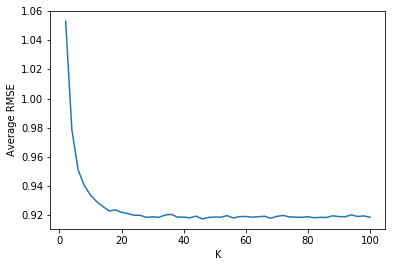

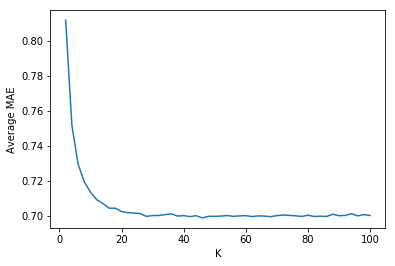

In [118]:
# Question 10

def q10():
    test_rmse = []
    test_mae = []
    k_val = range(2,102,2)
    for i in k_val:
        print(i)
        algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = i,sim_options = {'name': 'pearson','user_based': True})
        output = surprise.model_selection.cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
        rmse = output['test_rmse']
        mae = output['test_mae']
        test_rmse.append(sum(rmse)/10.0)
        test_mae.append(sum(mae)/10.0)
    print("\n\nK values: ", k_val)
    print("\n\nAverage RMSE Values: ", test_rmse)
    print("\n\nAverage MAE Values", test_mae)
    plt.plot(k_val,test_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_val,test_mae)
    plt.xlabel('K')
    plt.ylabel('Average MAE')
    plt.show()
    return test_rmse, test_mae

test_rmse, test_mae = q10()

In [120]:
# Question 11: 

def q11():
    
    for i in range(1, len(test_rmse)):
        if (test_rmse[i-1]-test_rmse[i] <= 0.001) and (test_rmse[i-1]-test_rmse[i] >0):# and (test_mae[i-1]-test_mae[i] >0) and (test_mae[i-1]-test_mae[i] <= 0.001):
            print(2*i + 1, test_rmse[i-1]-test_rmse[i], test_rmse[i-1]-test_rmse[i])

q11()

21 0.000820891628615 0.000820891628615
25 8.50192067903e-05 8.50192067903e-05
31 0.000415378135709 0.000415378135709
39 3.10612911787e-05 3.10612911787e-05
41 0.000458148173172 0.000458148173172
51 7.26512951993e-05 7.26512951993e-05
61 0.000504252059666 0.000504252059666
73 0.000995789022457 0.000995789022457
75 0.000158901332869 0.000158901332869
77 0.000134738369997 0.000134738369997
81 0.000726744385218 0.000726744385218
85 6.71076427261e-05 6.71076427261e-05
89 0.000571233934351 0.000571233934351
91 6.72912889819e-05 6.72912889819e-05
99 0.000901498198907 0.000901498198907


2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Computing the pearson similarity matrix...
Done computing similarity matrix.
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
68
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matr

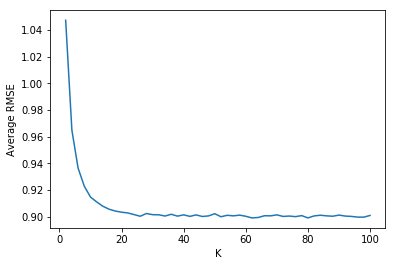

Minimum average RMSE:  0.899107659471


In [15]:
# Question 12
def popular_trimming_filter(testset):
    trimmed_testset = []
    
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        if c > 2:
            trimmed_testset.append(i)
    
    return(trimmed_testset)

def q12():
    avg_rmse = []
    k_val = range(2,102,2)

    for i in k_val:
        print(i)

        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = i,sim_options = {'name': 'pearson','user_based': True})

        rmse = 0
        for trainset, testset in kf.split(data):
            #print(testset)
            algo.fit(trainset)
            trimmed_testset = popular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q12()

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Computing the pearson similarity matrix...
Done computing similarity matrix.
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
68
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matr

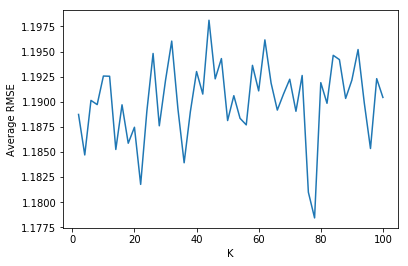

Minimum average RMSE:  1.1784322993


In [17]:
# Question 13

def unpopular_trimming_filter(testset):
    trimmed_testset = []
    
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        if c <= 2:
            trimmed_testset.append(i)
    
    return(trimmed_testset)

def q13():
    avg_rmse = []

    k_val = range(2,102,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = i,sim_options = {'name': 'pearson','user_based': True}, verbose=False)

        rmse = 0
        for trainset, testset in kf.split(data):

            algo.fit(trainset)
            trimmed_testset = unpopular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)


    print(k_val)
    print(avg_rmse)
    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))
    
q13()

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Computing the pearson similarity matrix...
Done computing similarity matrix.
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
68
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matr

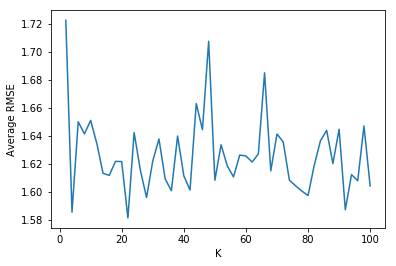

Minimum average RMSE:  1.58121032567


In [19]:
# Question 14

def variance_trimming_filter(testset):
    trimmed_testset = []
    
    data=zip(movie_list,rating_list)
    d = collections.defaultdict(list)
    for movie,rating in data:
        d[movie].append(rating)
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        
        if c >= 5:
            var=np.var(d[int(i[1])])
            if var>=2:
                trimmed_testset.append(i)
    return(trimmed_testset)

def q14():
    avg_rmse = []

    k_val = range(2,102,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = i,sim_options = {'name': 'pearson','user_based': True}, verbose=False)

        rmse = 0
        for trainset, testset in kf.split(data):

            algo.fit(trainset)
            trimmed_testset = variance_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)
    print(k_val)
    print(avg_rmse)
    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))
    
q14()

Computing the pearson similarity matrix...
Done computing similarity matrix.

Area under the ROC curve:  0.767938934692



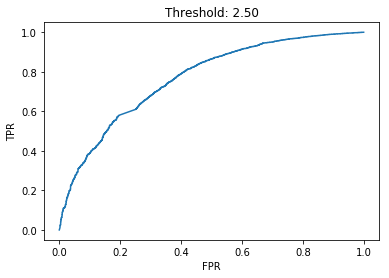


Area under the ROC curve:  0.773866233401



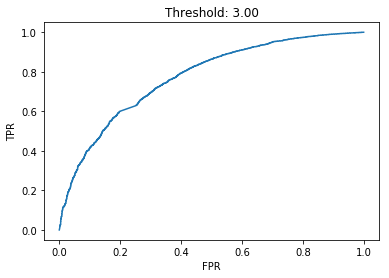


Area under the ROC curve:  0.774249945241



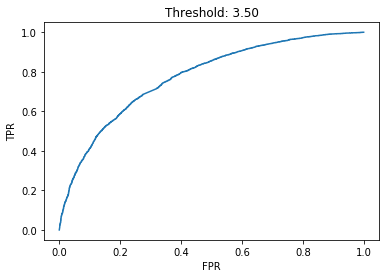


Area under the ROC curve:  0.778350703781



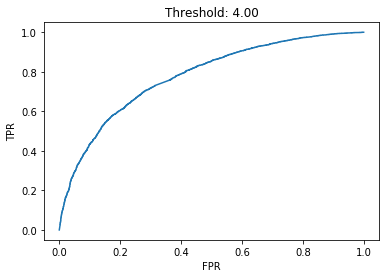

In [21]:
# Question 15: ROC

from sklearn.metrics import roc_curve, auc

def binary_classifier(l, threshold):
    bin_r = []
    for i in l:
        if i < threshold:
            bin_r.append(0)
        else:
            bin_r.append(1)
    return bin_r

def q15():

    trainset, testset = surprise.model_selection.train_test_split(data, test_size=0.1)

    algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = 20, sim_options = {'name': 'pearson','user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [2.5, 3, 3.5, 4]
   
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
       
        roc_auc = auc(fpr, tpr)
        print('\nArea under the ROC curve: ', roc_auc)
        print()
       
        plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.title('Threshold: %0.2f'% i)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

q15()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
range(2, 52, 2)
[1.1773728647584902, 1.070621469751889, 1.0122901999442271, 0.97649386684495809, 0.9541799035771108, 0.94739732321110393, 0.94154377277041534, 0.93786163127667899, 0.93700221090647362, 0.93984121327810399, 0.94357776718515873, 0.9453247409027139, 0.94738114250275629, 0.95291588701219732, 0.95636681724053196, 0.96116923122893638, 0.96314395844386291, 0.9669788384857757, 0.96988787064365789, 0.97560439150581435, 0.98174959252425431, 0.98338036950533447, 0.98620056093558206, 0.99007398611441655, 0.99346846944670286]
[0.99555624656187702, 0.88035044499761883, 0.81490225879036182, 0.77308803629631728, 0.74630777450233221, 0.73420454606756058, 0.72594671014455381, 0.71910415915154902, 0.71398096819545265, 0.71404132889846239, 0.71480710545644666, 0.71474734087928427, 0.71491932358377985, 0.7183450794638786, 0.72080977179471994, 0.72339030749279576, 0.72349029556872801, 0.7262298528282034, 0.728844711149005

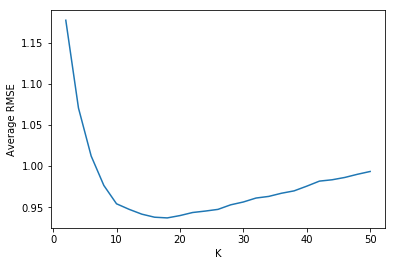

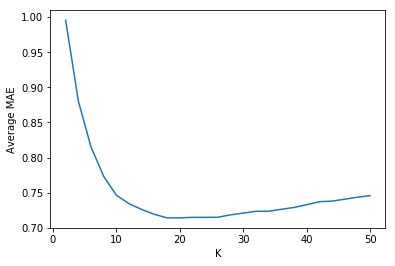

In [22]:
# Question 17: 

def q17():
    avg_rmse = []
    test_rmse = []
    test_mae = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=i)

        output = surprise.model_selection.cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
        rmse = output['test_rmse']
        mae = output['test_mae']
        test_rmse.append(sum(rmse)/10.0)
        test_mae.append(sum(mae)/10.0)

    print(k_val)
    print(test_rmse)
    print(test_mae)
    plt.plot(k_val,test_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_val,test_mae)
    plt.xlabel('K')
    plt.ylabel('Average MAE')
    plt.show()
    
    return test_rmse, test_mae

test_rmse, test_mae = q17()

In [132]:
# Question 18

def q18(avg_rmse, avg_mae):
    
    optimal_k = avg_rmse.index(min(avg_rmse))
    
    print('Optimal Number of latent factor (k): ', (optimal_k))#+1)*2)
    
    print('Minimum Average RMSE: ', avg_rmse[optimal_k])
    print('Minimum Average MAE: ', avg_mae[optimal_k])
    
q18(test_rmse, test_mae)

Optimal Number of latent factor (k):  22
Minimum Average RMSE:  0.91738780326
Minimum Average MAE:  0.698970068437


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


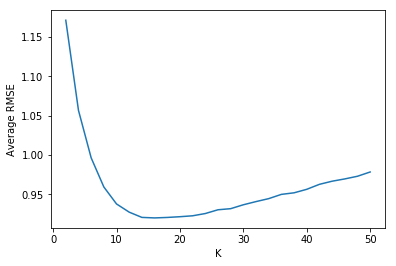

Minimum average RMSE:  0.919919901815


In [161]:
def q19():
    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = popular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q19()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


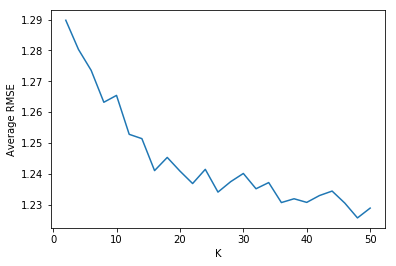

Minimum average RMSE:  1.22568546557


In [39]:
def q20():
    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = unpopular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q20()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


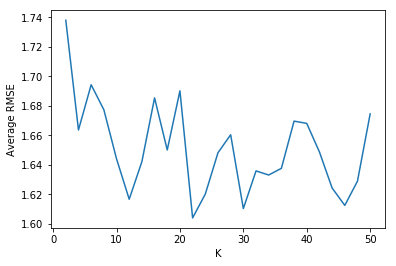

Minimum average RMSE:  1.60408033118


In [77]:
def q21():

    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = variance_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q21()


Area under the ROC curve:  0.761871525875



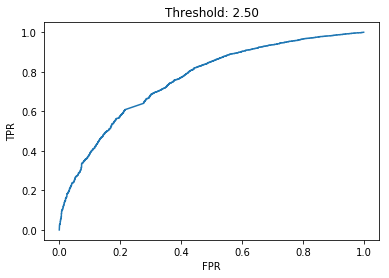


Area under the ROC curve:  0.763712328655



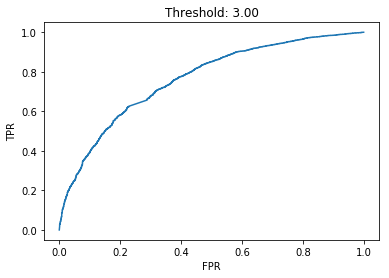


Area under the ROC curve:  0.754819036692



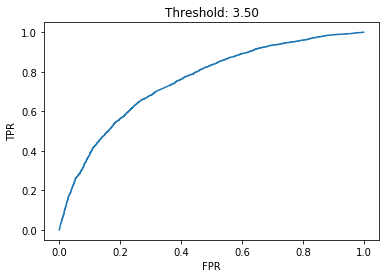


Area under the ROC curve:  0.75790356583



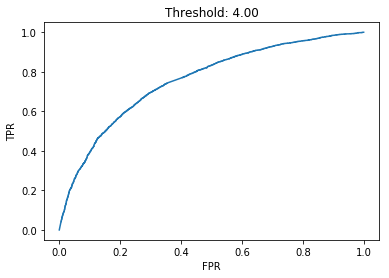

In [28]:
from sklearn.metrics import roc_curve, auc

def binary_classifier(l, threshold):
    bin_r = []
    for i in l:
        if i < threshold:
            bin_r.append(0)
        else:
            bin_r.append(1)
    return bin_r

def q22():

#     rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
#     data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

    trainset, testset = surprise.model_selection.train_test_split(data, test_size=0.1)

    algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=20)
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [2.5, 3, 3.5, 4]
   
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
       
        roc_auc = auc(fpr, tpr)
        print('\nArea under the ROC curve: ', roc_auc)
        print()
       
        plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.title('Threshold: %0.2f'% i)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

q22()

In [187]:
# Question 23

def get_movie_id():
    
    movie_id = dict()
    ind =0
    for i in movie_list:
        if i in movie_id.values():
            continue
        else:
            movie_id[ind] = i
            ind += 1
    
    return movie_id
    

def q23():
    trainset = data.build_full_trainset()

    algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=20, random_state=42)
    algo.fit(trainset)
    
    U = algo.pu
    V = algo.qi
    
    sorted_V_indices = np.argsort(V, axis=0)
    
    movie_id = get_movie_id()
    top_movies = []
    
    for col in range(20):
        tmp = list()
        for row in range(-1, -11, -1):
            tmp.append(movie_id[sorted_V_indices[row][col]])
        top_movies.append(tmp)
        
    print(top_movies)
    return(top_movies)

top_movies = q23()

[[451, 6686, 3865, 6450, 2152, 87520, 190, 3133, 69526, 47423], [48322, 392, 62912, 2888, 4404, 2907, 2938, 3914, 1306, 1683], [91104, 2524, 114662, 2741, 55250, 55267, 612, 5120, 73290, 74946], [334, 8387, 765, 1050, 71, 3420, 8, 2570, 27478, 6127], [4898, 8117, 2689, 122882, 47491, 1600, 26084, 3391, 3653, 2492], [8860, 166, 3490, 94018, 3573, 66509, 106072, 93363, 32596, 8836], [3973, 2483, 3672, 2365, 6538, 1128, 6493, 72405, 4518, 1348], [4630, 4424, 5002, 662, 94466, 1924, 4652, 121231, 42002, 7236], [4483, 5621, 3725, 3771, 3272, 2365, 3807, 53953, 3125, 270], [6219, 7155, 31364, 7505, 32853, 106062, 4396, 2968, 107141, 5490], [2285, 483, 87304, 71745, 101895, 103137, 4941, 116161, 103372, 116799], [99, 1005, 3181, 4965, 1232, 3892, 2903, 4076, 4010, 1111], [5477, 5893, 32019, 1255, 3072, 7481, 121231, 3067, 6214, 2560], [5427, 670, 1112, 2829, 5128, 1592, 7991, 3594, 3270, 3260], [63853, 62912, 7991, 1595, 3520, 4792, 6593, 7255, 33164, 58315], [55167, 6367, 5047, 4624, 63, 276

In [188]:
# mapping movies to genres

movie_data = pd.read_csv('movies.csv', usecols=[0, 1, 2])

movie_ids = list(movie_data.movieId)
genres = list(movie_data.genres)

genre_dict = {}

for ids in range(len(movie_ids)):
    if movie_ids[ids] not in genre_dict.keys():
        genre_dict[movie_ids[ids]] = genres[ids]

for i in top_movies:
    for j in i:
        print(genre_dict[j])
    print()

Drama|Mystery|Romance
Action|Comedy|Crime|Fantasy
Comedy|Documentary
Drama|War
Children|Comedy
Action|Adventure|Sci-Fi|War|IMAX
Thriller
Comedy|Western
Action|Adventure|Sci-Fi|IMAX
Drama

Comedy|Documentary
Adventure|Animation
Musical
Comedy|Romance
Drama|Fantasy|Horror
Comedy
Drama|Sci-Fi
Drama
Adventure|Drama|Sci-Fi
Drama|Romance

Adventure|Drama|Fantasy|Romance
Action|Adventure|Drama|Thriller
Action|War
Action|Crime|Thriller
Comedy
Comedy|Drama|Romance
Comedy
Comedy|Mystery|Thriller
Drama
Comedy

Drama
Comedy|Crime
Comedy|Drama
Documentary|Drama
Action
Drama|Thriller
Adventure|Children
Drama|Romance
Comedy
Drama

Comedy|Crime|Mystery|Thriller
Action|Comedy
Documentary
Action|Adventure|Sci-Fi|Thriller
Comedy|Drama
Drama|Romance
Children|Comedy|Musical|Romance
Comedy
Documentary
Comedy|Romance

Action|Crime|Drama|Mystery|Thriller
Comedy|Crime|Drama
Horror
Action|Sci-Fi|Thriller|IMAX
Horror|Sci-Fi
Comedy|Drama
Action|Adventure|Fantasy|IMAX
Action|Adventure|Sci-Fi|IMAX
Action|Adventure|

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
range(2, 52, 2)
[1.1768397994899087, 1.0709124907298202, 1.0120777865229202, 0.97557452903278752, 0.9580975744861997, 0.94694214230363483, 0.94175563867956469, 0.93994399504052883, 0.93941601668091901, 0.94270830119290205, 0.94178398395112384, 0.94676834273666066, 0.94625443385398833, 0.95086752927117835, 0.95766144794571972, 0.9592027139166458, 0.96302521742386404, 0.96853335647945804, 0.97185526863651717, 0.97623282479852569, 0.97771724651047742, 0.98344226330445417, 0.98627448593204881, 0.9893587064374797, 0.99384959246778437]
[0.99538487880511828, 0.88090882516878943, 0.81463715103680401, 0.77167518121140366, 0.74894642296312708, 0.73486480219087535, 0.72582376806639692, 0.72043420428687432, 0.71654680226771994, 0.71570376006305092, 0.71414258311387047, 0.71552058345698732, 0.71454621884243363, 0.71728887826073007, 0.72122147846712736, 0.72202286641227409, 0.72439619018850654, 0.72807396741780583, 0.729340411314

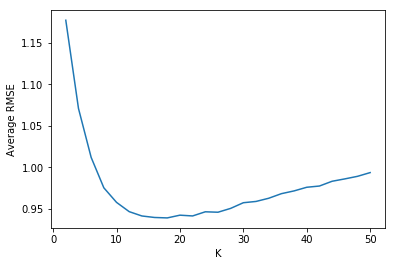

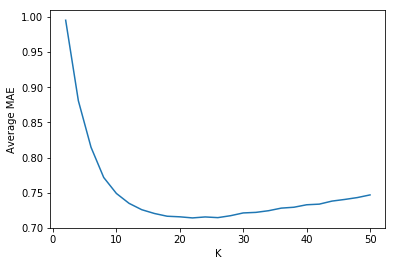

In [31]:
def q24():
    avg_rmse = []
    test_rmse = []
    test_mae = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=i)

        output = surprise.model_selection.cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
        rmse = output['test_rmse']
        mae = output['test_mae']
        test_rmse.append(sum(rmse)/10.0)
        test_mae.append(sum(mae)/10.0)

    print(k_val)
    print(test_rmse)
    print(test_mae)
    plt.plot(k_val,test_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_val,test_mae)
    plt.xlabel('K')
    plt.ylabel('Average MAE')
    plt.show()
    
    return test_rmse, test_mae

test_rmse, test_mae = q17()

In [159]:
def q25(avg_rmse, avg_mae):
    optimal_k = avg_rmse.index(min(avg_rmse))
    
    print('Optimal Number of latent factor (k): ', (optimal_k))#+1)*2)
    
    print('Minimum Average RMSE: ', avg_rmse[optimal_k])
    print('Minimum Average MAE: ', avg_mae[optimal_k])

    
q25(test_rmse, test_mae)   


Optimal Number of latent factor (k):  22
Minimum Average RMSE:  0.91738780326
Minimum Average MAE:  0.698970068437


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


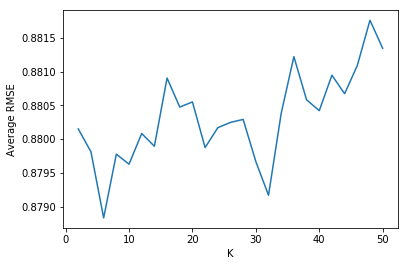

Minimum average RMSE:  0.878833173986


In [33]:
def q26():
#     rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
#     data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = popular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q26()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


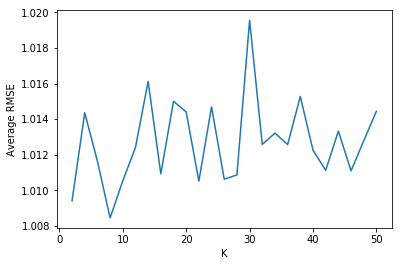

Minimum average RMSE:  1.00845151548


In [34]:
def q27():
#     rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
#     data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = unpopular_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q27()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


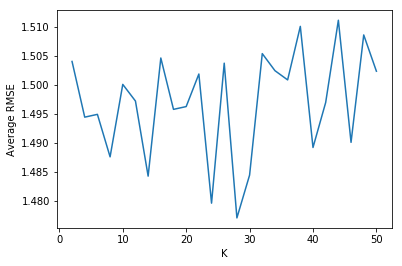

Minimum average RMSE:  1.4771089218


In [35]:
def q28():
#     rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
#     data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

    avg_rmse = []
    k_val = range(2,52,2)

    for i in k_val:
        print(i)
        kf =  surprise.model_selection.split.KFold(n_splits=10)
        algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=i)

        rmse = 0
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            trimmed_testset = variance_trimming_filter(testset)
            predictions = algo.test(trimmed_testset)
            rmse += surprise.accuracy.rmse(predictions, verbose=False)

        rmse = (rmse*1.0)/(10.0)

        avg_rmse.append(rmse)

    plt.plot(k_val,avg_rmse)
    plt.xlabel('K')
    plt.ylabel('Average RMSE')
    plt.show()

    print('Minimum average RMSE: ', min(avg_rmse))

q28()


Area under the ROC curve:  0.769530226079



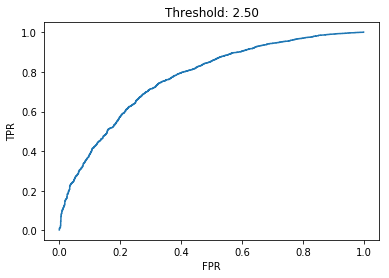


Area under the ROC curve:  0.780293202469



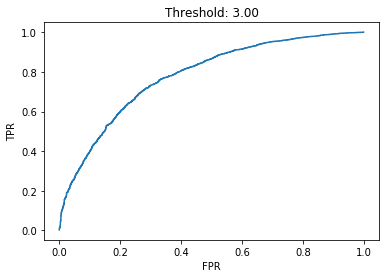


Area under the ROC curve:  0.773677553877



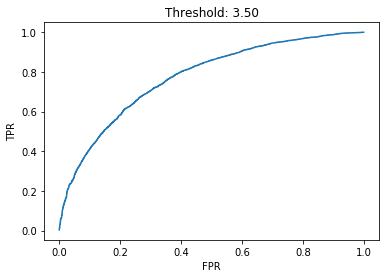


Area under the ROC curve:  0.780895155784



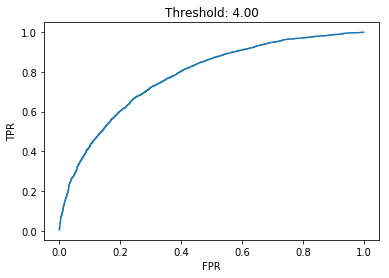

In [38]:
def q29():

    trainset, testset = surprise.model_selection.train_test_split(data, test_size=0.1)

    algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=20)
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [2.5, 3, 3.5, 4]
   
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
       
        roc_auc = auc(fpr, tpr)
        print('\nArea under the ROC curve: ', roc_auc)
        print()
       
        plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.title('Threshold: %0.2f'% i)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

q29()

In [175]:
# Question 30

class myalgo(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):

        AlgoBase.fit(self, trainset)
        self.userDict={}
  
        for (u, m, r) in self.trainset.all_ratings() :

            if(u in self.userDict):
                self.userDict[u].append(r)
            else:
                self.userDict[u]=[r]

        return self

    def estimate(self, u, i):

        return sum(self.userDict[u])/(len(self.userDict[u]))


rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
ratings_df=pd.read_csv("ratings.csv")
data = Dataset.load_from_df(ratings_df[['userId','movieId','rating']],reader=rd)
avg_rmse = []
kf =  surprise.model_selection.split.KFold(n_splits=10)
model=myalgo()
model.fit(data.build_full_trainset())

for trainset,testset in kf.split(data):
    rmse=0
    prediction=model.test(testset)
    rmse=surprise.accuracy.rmse(prediction, verbose=False)
    avg_rmse.append(rmse)

print('Average RMSE: ', np.mean(avg_rmse))

Average RMSE:  0.955393330429


In [177]:
# Question 31

class myalgo(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        self.userDict={}
  
        for (u, m, r) in self.trainset.all_ratings() :

            if(u in self.userDict):
                self.userDict[u].append(r)
            else:
                self.userDict[u]=[r]

        return self

    def estimate(self, u, i):

        return sum(self.userDict[u])/(len(self.userDict[u]))

def popular_trimming_filter(testset):
    trimmed_testset = []
    
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        if c > 2:
            trimmed_testset.append(i)
    
    return(trimmed_testset)


df = pd.read_csv('ratings.csv',delimiter=',', names = ['user_id', 'item_id', 'rating', 'timestamp'], header=0)
movie_list = list(df.item_id)
rating_list=list(df.rating)
rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
ratings_df=pd.read_csv("ratings.csv")
data = Dataset.load_from_df(ratings_df[['userId','movieId','rating']],reader=rd)
avg_rmse = []
kf =  surprise.model_selection.split.KFold(n_splits=10)
model=myalgo()
model.fit(data.build_full_trainset())

for trainset,testset in kf.split(data):
    rmse=0
    trimmed_testset = popular_trimming_filter(testset)
    prediction=model.test(trimmed_testset)
    rmse=surprise.accuracy.rmse(prediction, verbose=False)
    avg_rmse.append(rmse)

print('Average RMSE: ', np.mean(avg_rmse))

Average RMSE:  0.952108601061


In [180]:
# Question 32

class myalgo(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        self.userDict={}
  
        for (u, m, r) in self.trainset.all_ratings() :

            if(u in self.userDict):
                self.userDict[u].append(r)
            else:
                self.userDict[u]=[r]

        return self

    def estimate(self, u, i):

        return sum(self.userDict[u])/(len(self.userDict[u]))

def unpopular_trimming_filter(testset):
    trimmed_testset = []
    
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        if c <= 2:
            trimmed_testset.append(i)
    
    return(trimmed_testset)


df = pd.read_csv('ratings.csv',delimiter=',', names = ['user_id', 'item_id', 'rating', 'timestamp'], header=0)
movie_list = list(df.item_id)
rating_list=list(df.rating)
rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
ratings_df=pd.read_csv("ratings.csv")
data = Dataset.load_from_df(ratings_df[['userId','movieId','rating']],reader=rd)
avg_rmse = []
kf =  surprise.model_selection.split.KFold(n_splits=10)
model=myalgo()
model.fit(data.build_full_trainset())

for trainset,testset in kf.split(data):
    rmse=0
    trimmed_testset = unpopular_trimming_filter(testset)
    prediction=model.test(trimmed_testset)
    rmse=surprise.accuracy.rmse(prediction, verbose=False)
    avg_rmse.append(rmse)

print('Average RMSE: ', np.mean(avg_rmse))

Average RMSE:  1.01085895276


In [182]:
# Question 33

class myalgo(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        self.userDict={}
  
        for (u, m, r) in self.trainset.all_ratings() :

            if(u in self.userDict):
                self.userDict[u].append(r)
            else:
                self.userDict[u]=[r]

        return self

    def estimate(self, u, i):

        return sum(self.userDict[u])/(len(self.userDict[u]))

def variance_trimming_filter(testset):
    trimmed_testset = []
    
    data=zip(movie_list,rating_list)
    d = collections.defaultdict(list)
    for movie,rating in data:
        d[movie].append(rating)
    movie_counts = Counter(movie_list)
    
    for i in testset:
        c = movie_counts[int(i[1])]
        
        if c >= 5:
            var=np.var(d[int(i[1])])
            if var>=2:
                trimmed_testset.append(i)
    return(trimmed_testset)


df = pd.read_csv('ratings.csv',delimiter=',', names = ['user_id', 'item_id', 'rating', 'timestamp'], header=0)
movie_list = list(df.item_id)
rating_list=list(df.rating)
rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
ratings_df=pd.read_csv("ratings.csv")
data = Dataset.load_from_df(ratings_df[['userId','movieId','rating']],reader=rd)
avg_rmse = []
kf =  surprise.model_selection.split.KFold(n_splits=10)
model=myalgo()
model.fit(data.build_full_trainset())

for trainset,testset in kf.split(data):
    rmse=0
    trimmed_testset = variance_trimming_filter(testset)
    prediction=model.test(trimmed_testset)
    rmse=surprise.accuracy.rmse(prediction, verbose=False)
    avg_rmse.append(rmse)

print('Average RMSE: ', np.mean(avg_rmse))

Average RMSE:  1.5156828589


Computing the pearson similarity matrix...
Done computing similarity matrix.
0.77416078509
0.763628402297
0.775628112505


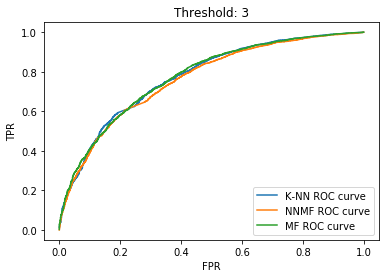

In [191]:
# Question 34

def binary_classifier(l, threshold):
    bin_r = []
    for i in l:
        if i < threshold:
            bin_r.append(0)
        else:
            bin_r.append(1)
    return bin_r

def q34():

    rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
    data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

    trainset, testset = surprise.model_selection.train_test_split(data, test_size=0.1)

    algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = 24,sim_options = {'name': 'pearson','user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [3]
    
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
        roc_auc = auc(fpr, tpr)
        print(roc_auc)
        plt.plot(fpr, tpr, label='K-NN ROC curve')

    algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=20)
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [3]
   
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
        roc_auc = auc(fpr, tpr)
        print(roc_auc)
        plt.plot(fpr, tpr, label='NNMF ROC curve')


    algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=100)
    algo.fit(trainset)
    predictions = algo.test(testset)

    actual_rating = list()
    predicted_ratings = list()
    for i in predictions:
        actual_rating.append(i[2])
        predicted_ratings.append(i[3])

    thresholds = [3]
   
    for i in thresholds:
        bin_ratings = binary_classifier(actual_rating, i)
        fpr, tpr, thresholds = roc_curve(bin_ratings, predicted_ratings)
        roc_auc = auc(fpr, tpr)
        print(roc_auc)
        plt.plot(fpr, tpr, label='MF ROC curve')


    plt.title('Threshold: 3')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.show()

q34()

1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
23
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

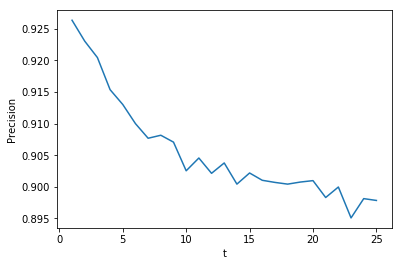

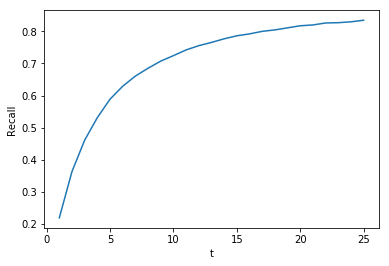

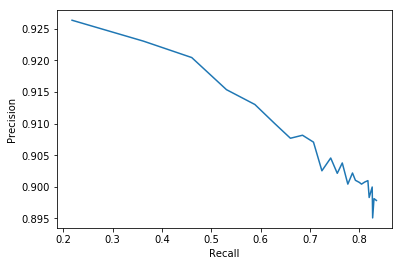

In [195]:
# Question 36

def precision_recall_at_k(predictions, k=10, threshold=3.5):
   
	user_est_true = defaultdict(list)
	for uid, _, true_r, est, _ in predictions:
		user_est_true[uid].append((est, true_r))

	precisions = dict()
	recalls = dict()
	
	for uid, user_ratings in user_est_true.items():

		user_ratings.sort(key=lambda x: x[0], reverse=True)

		n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

		n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

		n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
			for (est, true_r) in user_ratings[:k])

		precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

		recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

	return precisions, recalls



def q36():
	rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1, rating_scale=(0.5, 5))
	data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = 20,sim_options = {'name': 'pearson','user_based': True})
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)	
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
   		
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(t,avg_precision)
	plt.xlabel('t')
	plt.ylabel('Precision')
	plt.show()

	plt.plot(t,avg_recall)
	plt.xlabel('t')
	plt.ylabel('Recall')
	plt.show()

	plt.plot(avg_recall,avg_precision)
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.show()

q36()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


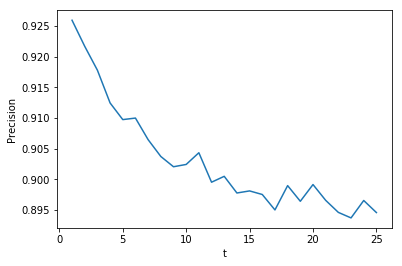

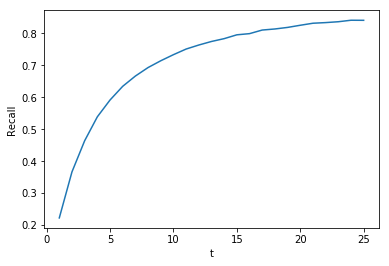

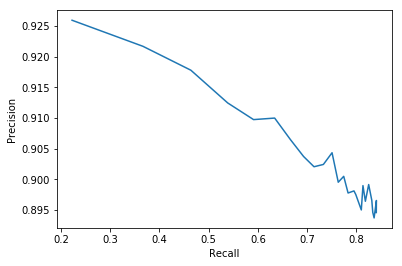

In [196]:
# Question 37

def precision_recall_at_k(predictions, k=10, threshold=3.5):
   
	user_est_true = defaultdict(list)
	for uid, _, true_r, est, _ in predictions:
		user_est_true[uid].append((est, true_r))

	precisions = dict()
	recalls = dict()
	
	for uid, user_ratings in user_est_true.items():

		user_ratings.sort(key=lambda x: x[0], reverse=True)

		n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

		n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

		n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
			for (est, true_r) in user_ratings[:k])

		precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

		recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

	return precisions, recalls

def q37():
	rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
	data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=20)
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)	
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
   		
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(t,avg_precision)
	plt.xlabel('t')
	plt.ylabel('Precision')
	plt.show()

	plt.plot(t,avg_recall)
	plt.xlabel('t')
	plt.ylabel('Recall')
	plt.show()

	plt.plot(avg_recall,avg_precision)
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.show()

q37()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


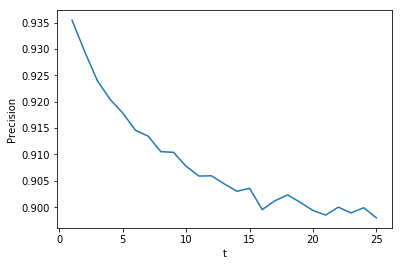

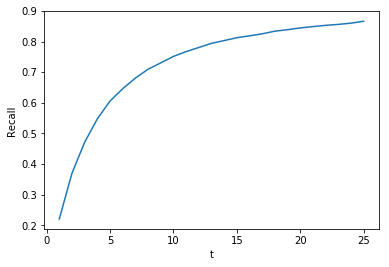

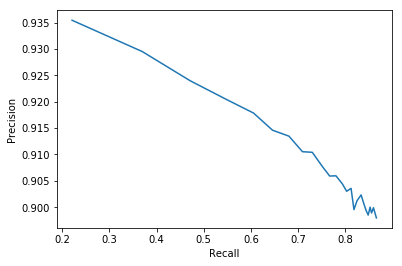

In [197]:
# Question 38

def precision_recall_at_k(predictions, k=10, threshold=3.5):
   
	user_est_true = defaultdict(list)
	for uid, _, true_r, est, _ in predictions:
		user_est_true[uid].append((est, true_r))

	precisions = dict()
	recalls = dict()
	
	for uid, user_ratings in user_est_true.items():
		user_ratings.sort(key=lambda x: x[0], reverse=True)
		n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
		n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
		n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
			for (est, true_r) in user_ratings[:k])
		precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
		recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
	return precisions, recalls

def q38():
	rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
	data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=20)
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)	
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(t,avg_precision)
	plt.xlabel('t')
	plt.ylabel('Precision')
	plt.show()

	plt.plot(t,avg_recall)
	plt.xlabel('t')
	plt.ylabel('Recall')
	plt.show()

	plt.plot(avg_recall,avg_precision)
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.show()

q38()

In [ ]:
# Question 39

def precision_recall_at_k(predictions, k=10, threshold=3.5):
   
	user_est_true = defaultdict(list)
	for uid, _, true_r, est, _ in predictions:
		user_est_true[uid].append((est, true_r))

	precisions = dict()
	recalls = dict()
	
	for uid, user_ratings in user_est_true.items():
		user_ratings.sort(key=lambda x: x[0], reverse=True)
		n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
		n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
		n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
			for (est, true_r) in user_ratings[:k])
		precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
		recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
	return precisions, recalls



def q39():
	rd = surprise.reader.Reader(line_format=u'user item rating timestamp', sep=',',  skip_lines=1)
	data = surprise.Dataset.load_from_file(file_path='ratings.csv',reader=rd)

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.knns.KNNWithMeans(k = 20,sim_options = {'name': 'pearson','user_based': True})
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
   		
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(avg_recall,avg_precision,label='K-NN Precision Recall curve')

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors=20)
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)	
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
   		
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(avg_recall,avg_precision,label='NNMF Precision Recall curve')

	t = range(1,26,1)
	avg_precision=[]
	avg_recall=[]
	for i in t:
		print(i)
		kf =  surprise.model_selection.split.KFold(n_splits=10)
		algo = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=20)
		precision=[]
		recall=[]

		for trainset, testset in kf.split(data):
			algo.fit(trainset)	
			predictions = algo.test(testset)
			precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)
			precision.append(sum(precisions.values())/len(precisions))
			recall.append(sum(recalls.values())/len(recalls))
   		
		avg_precision.append(sum(precision)/len(precision))
		avg_recall.append(sum(recall)/len(recall))

	plt.plot(avg_recall,avg_precision,label='MF Precision Recall curve')
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.legend()
	plt.show()


q39()

1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
